In [ ]:
import re
import contractions
from TextCleaner import TextCleaner
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline
import nltk
from langdetect import detect
from nltk.corpus import stopwords
from textblob import Word
from sklearn.preprocessing import LabelEncoder
from collections import Counter
from wordcloud import WordCloud
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem.snowball import PorterStemmer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, GRU, SimpleRNN, SpatialDropout1D
from tensorflow.keras.layers import SpatialDropout1D
from tensorflow.keras.layers import Embedding

# Classifiers
from sklearn.naive_bayes import BernoulliNB
from sklearn import metrics
from sklearn.naive_bayes import (
    BernoulliNB,
    ComplementNB,
    MultinomialNB,
)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
pd.options.mode.chained_assignment = None  # default='warn'

In [3]:
df = pd.read_csv('sentiment.csv')
df = df.drop(df.columns[0], axis=1)
df

,Author,Text,Time,Like Count,Currency ISO Code,Url,target
0,yusobays,@elonmusk @elonmusk please Come to TRY₺ #turk...,2021-01-31 22:21:58+00:00,1,TRY,https://twitter.com/yusobays/status/1356004827...,0.0
1,BtcTurkDestek,"@DrBatal Hello, if you have registered using ...",2021-01-30 18:07:15+00:00,0,TRY,https://twitter.com/BtcTurkDestek/status/13555...,0.0
2,RisingValhalla,“I trade weekly bars. You?”\n\n200 day moving ...,2021-01-30 03:29:59+00:00,0,TRY,https://twitter.com/RisingValhalla/status/1355...,0.0
3,Erda55203615,@elonmusk Try turkish lira its at the bottom m...,2021-01-29 20:20:49+00:00,0,TRY,https://twitter.com/Erda55203615/status/135524...,-1.0
4,Erda55203615,@ImTooRealForU TRY FUCKING TURKISH LIRA,2021-01-29 20:19:36+00:00,0,TRY,https://twitter.com/Erda55203615/status/135524...,-1.0
...,...,...,...,...,...,...,...
1944,flyingstocksman,For those of you who missed it last night with...,2021-01-01 09:24:17+00:00,0,GBP,https://twitter.com/flyingstocksman/status/134...,0.0
1945,alpeshbp,GBP/USD Weekly Price Forecast – The British Po...,2021-01-01 07:13:32+00:00,0,GBP,https://twitter.com/alpeshbp/status/1344904575...,0.0
1946,campsbay_com,"20.0142 ZAR for 1 GBP @ December 31, 2020 at 0...",2021-01-01 04:20:02+00:00,0,GBP,https://twitter.com/campsbay_com/status/134486...,0.0
1947,MajorFXNow,GBP/EUR: Pound Lifted by UK Approval of AstraZ...,2021-01-01 02:32:32+00:00,0,GBP,https://twitter.com/MajorFXNow/status/13448338...,0.0


In [5]:
def sentiments(df):
    if df['target'] >= 0:
        return 'Positive'
    elif df['target'] < 0:
        return 'Negative'      

In [6]:
def detect_lang(df):
    return detect(df['Text']) 

In [7]:
df['Sentiment'] = df.apply(sentiments, axis=1)
#df['Language'] = df.apply(detect_lang, axis=1)

In [8]:
#df = df[df['Language'] == 'en']
df

,Author,Text,Time,Like Count,Currency ISO Code,Url,target,Sentiment
0,yusobays,@elonmusk @elonmusk please Come to TRY₺ #turk...,2021-01-31 22:21:58+00:00,1,TRY,https://twitter.com/yusobays/status/1356004827...,0.0,Positive
1,BtcTurkDestek,"@DrBatal Hello, if you have registered using ...",2021-01-30 18:07:15+00:00,0,TRY,https://twitter.com/BtcTurkDestek/status/13555...,0.0,Positive
2,RisingValhalla,“I trade weekly bars. You?”\n\n200 day moving ...,2021-01-30 03:29:59+00:00,0,TRY,https://twitter.com/RisingValhalla/status/1355...,0.0,Positive
3,Erda55203615,@elonmusk Try turkish lira its at the bottom m...,2021-01-29 20:20:49+00:00,0,TRY,https://twitter.com/Erda55203615/status/135524...,-1.0,Negative
4,Erda55203615,@ImTooRealForU TRY FUCKING TURKISH LIRA,2021-01-29 20:19:36+00:00,0,TRY,https://twitter.com/Erda55203615/status/135524...,-1.0,Negative
...,...,...,...,...,...,...,...,...
1944,flyingstocksman,For those of you who missed it last night with...,2021-01-01 09:24:17+00:00,0,GBP,https://twitter.com/flyingstocksman/status/134...,0.0,Positive
1945,alpeshbp,GBP/USD Weekly Price Forecast – The British Po...,2021-01-01 07:13:32+00:00,0,GBP,https://twitter.com/alpeshbp/status/1344904575...,0.0,Positive
1946,campsbay_com,"20.0142 ZAR for 1 GBP @ December 31, 2020 at 0...",2021-01-01 04:20:02+00:00,0,GBP,https://twitter.com/campsbay_com/status/134486...,0.0,Positive
1947,MajorFXNow,GBP/EUR: Pound Lifted by UK Approval of AstraZ...,2021-01-01 02:32:32+00:00,0,GBP,https://twitter.com/MajorFXNow/status/13448338...,0.0,Positive


In [82]:
data_v1 = df[['Text','Sentiment']]
data_v1.isnull().sum()

Text         0
Sentiment    0
dtype: int64

In [ ]:
'''for (rowNo, rowData) in df.iterrows():
    try:
        if rowNo == 1:
            data_v1.loc[rowNo, 'Text'] =  (df.loc[rowNo, 'Text'] + ' ') * df.loc[rowNo, 'Like Count']
    except Exception as e:                                                                          
        print("An error occurred : ", e)   '''

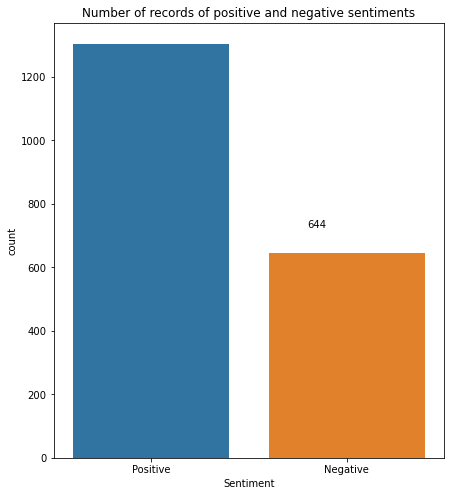

In [10]:
plt.figure(figsize=(7,8))
plt.title("Number of records of positive and negative sentiments")
plot = sn.countplot(x = 'Sentiment', data = data_v1)
for p in plot.patches:
    plot.annotate(p.get_height(),(p.get_x() + 0.2 ,p.get_height()+80))

In [11]:
clean = TextCleaner()
text = clean.convert_emoji_to_text("Hilarious 😂. The feeling of making a sale 😎, The feeling of actually fulfilling orders 😒")
print(text)

text4 = "Hello :-) :-)"
resp = clean.convert_emoticons(text4)
print(resp)

Hilarious face with tears of joy. The feeling of making a sale smiling face with sunglasses, The feeling of actually fulfilling orders unamused face
Hello Happy face smiley Happy face smiley


In [12]:
df

,Author,Text,Time,Like Count,Currency ISO Code,Url,target,Sentiment
0,yusobays,@elonmusk @elonmusk please Come to TRY₺ #turk...,2021-01-31 22:21:58+00:00,1,TRY,https://twitter.com/yusobays/status/1356004827...,0.0,Positive
1,BtcTurkDestek,"@DrBatal Hello, if you have registered using ...",2021-01-30 18:07:15+00:00,0,TRY,https://twitter.com/BtcTurkDestek/status/13555...,0.0,Positive
2,RisingValhalla,“I trade weekly bars. You?”\n\n200 day moving ...,2021-01-30 03:29:59+00:00,0,TRY,https://twitter.com/RisingValhalla/status/1355...,0.0,Positive
3,Erda55203615,@elonmusk Try turkish lira its at the bottom m...,2021-01-29 20:20:49+00:00,0,TRY,https://twitter.com/Erda55203615/status/135524...,-1.0,Negative
4,Erda55203615,@ImTooRealForU TRY FUCKING TURKISH LIRA,2021-01-29 20:19:36+00:00,0,TRY,https://twitter.com/Erda55203615/status/135524...,-1.0,Negative
...,...,...,...,...,...,...,...,...
1944,flyingstocksman,For those of you who missed it last night with...,2021-01-01 09:24:17+00:00,0,GBP,https://twitter.com/flyingstocksman/status/134...,0.0,Positive
1945,alpeshbp,GBP/USD Weekly Price Forecast – The British Po...,2021-01-01 07:13:32+00:00,0,GBP,https://twitter.com/alpeshbp/status/1344904575...,0.0,Positive
1946,campsbay_com,"20.0142 ZAR for 1 GBP @ December 31, 2020 at 0...",2021-01-01 04:20:02+00:00,0,GBP,https://twitter.com/campsbay_com/status/134486...,0.0,Positive
1947,MajorFXNow,GBP/EUR: Pound Lifted by UK Approval of AstraZ...,2021-01-01 02:32:32+00:00,0,GBP,https://twitter.com/MajorFXNow/status/13448338...,0.0,Positive


In [83]:
def remove_url(text):
    return re.sub(r"http\S+", "", text)

def replace_contractions(text):
    return contractions.fix(text)

abbs =  {"eur": "euro", "usd": "dollar", "gbp" : "pound", "u":"you", "tryeur":"turkish lira euro", "try":" turkish lira", "gt":"greater than","lt": "less than","btc":"bitcoin",
        "gbpusd": "pound dollar", "usdtry":"dollar turkish lira", "fx":"forex", "u":"you", "eurusd":"euro usd", "eurgbp":"euro pound", "jpy":"japanese yen","cny":"chinese yuan","uk":"united kingdom"}

def replace_currency(text):
    val = ''
    for i in text.split():
        if abbs.get(i.lower().strip()) is not None:
            #print(abbs.get(i.lower().strip()))
            val = val + str(abbs.get(i.lower().strip())) + ' '
        else:
            val = val + i + ' '
    return val

In [14]:
print(replace_currency("@elonmusk Try turkish lira its at the bottom"))

@elonmusk  turkish lira turkish lira its at the bottom 


In [84]:
clean = TextCleaner()

def cleaning(df_cl, stop_words):
    
    # Removing URLs
    df_cl["Text"] = df_cl["Text"].apply(lambda x: remove_url(x))
    
     # Removing mentioned author names
    df_cl["Text"] = df_cl["Text"].apply(lambda x: re.sub("@[A-Za-z0-9]+","", x))
    
    # Lowercase
    df_cl['Text'] = df_cl['Text'].apply(lambda x: ' '.join(x.lower() for x in x.split()))
    
    df_cl["Text"] = df_cl["Text"].apply(lambda x: replace_contractions(x))
    
    df_cl["Text"] = df_cl["Text"].apply(lambda x: replace_currency(x))
    
     # Remove Non -letters
    df_cl['Text'] = df_cl['Text'].apply(lambda x: re.sub(r"[^a-zA-Z0-9]", ' ', x))
    
    # Removing Punctuation
    df_cl["Text"] = df_cl["Text"].apply(lambda x: re.sub(r'[^\w\s]','', x))
    
    # Removing stop words
    df_cl['Text'] = df_cl['Text'].apply(lambda x:' '.join(x for x in x.split() if x not in stop_words))
    
    # Lemmatization
    df_cl['Text'] = df_cl['Text'].apply(lambda x:' '.join([Word(x).lemmatize() for x in x.split()]))
    
    # Emoticons
    df_cl['Text'] = df_cl['Text'].apply(lambda x: clean.convert_emoji_to_text(x))
    
    # Emojis
    df_cl['Text'] = df_cl['Text'].apply(lambda x: clean.convert_emoji_to_text(x))    
    
    # Stemming
    #df_cl['Text'] = df_cl['Text'].apply(lambda x: port_stemmer(x))
    return df_cl

stop_words = stopwords.words('english')

In [87]:
data_v1 = cleaning(data_v1, stop_words)

In [88]:
data_v1#['Text'][[15]]

,Text,Sentiment
0,please come turkish lira turkishlira,Positive
1,hello registered using turkish citizenship id ...,Positive
2,trade weekly bar 200 day moving average breach...,Positive
3,turkish lira turkish lira bottom maybe would go,Negative
4,turkish lira fucking turkish lira,Negative
...,...,...
1944,missed last night nye potentially important tw...,Positive
1945,pound dollar weekly price forecast british pou...,Positive
1946,20 0142 zar 1 pound december 31 2020 06 20am s...,Positive
1947,pound euro pound lifted united kingdom approva...,Positive


In [18]:
df['Text'][[15]]

15    U.S. Dollar / Turkish Lira Daily Chart - #USDT...
Name: Text, dtype: object

In [89]:
#pd.set_option('display.max_colwidth', None)
data_v1[data_v1['Text'].str.contains(" eur ")]

,Text,Sentiment


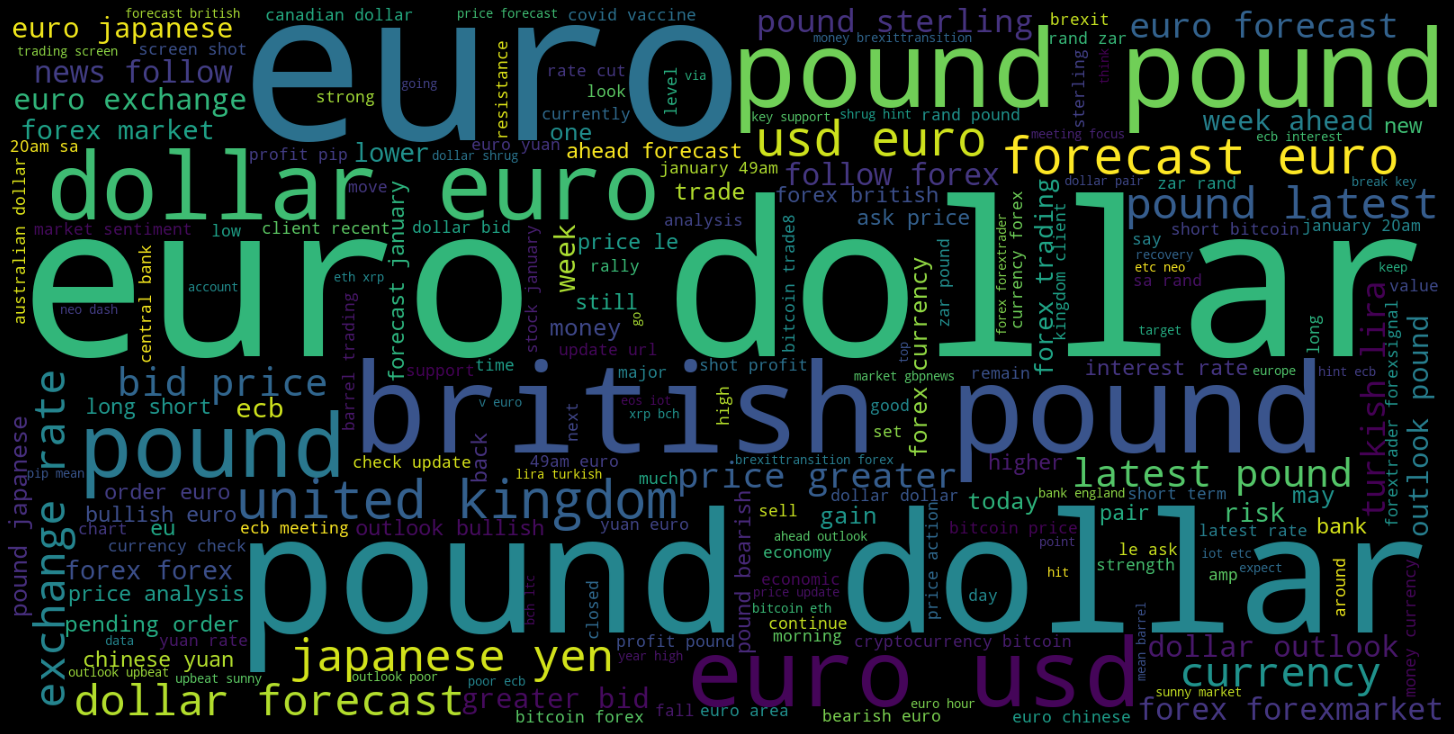

In [90]:
common_words = ''
for i in data_v1.Text:
    i = str(i)
    tokens = i.split()
    common_words += " ".join(tokens)+" "
wordcloud = WordCloud(width=1600, height=800).generate(common_words)
plt.figure( figsize=(20,10), facecolor='k')
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [91]:
lb = LabelEncoder()
data_v1['Sentiment'] = lb.fit_transform(data_v1['Sentiment'])

In [92]:
tokenizer = Tokenizer(num_words=1000, split=' ', lower=True) 
tokenizer.fit_on_texts(data_v1['Text'].values)
X = tokenizer.texts_to_sequences(df['Text'].values)
X = pad_sequences(X)

In [105]:
y = pd.get_dummies(data_v1['Sentiment'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [100]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
y = scaler.fit_transform(y)

In [106]:
y

,0,1
0,0,1
1,0,1
2,0,1
3,1,0
4,1,0
...,...,...
1944,0,1
1945,0,1
1946,0,1
1947,0,1


In [112]:
import pandas as pd
import os
import numpy as np
from sklearn import metrics
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

# np.argmax(pred,axis=1)
# Cross-validate
# Use for StratifiedKFold classification
kf = KFold(5)
    
oos_y = []
oos_pred = []
fold = 0

avg_acc = 0

# Must specify y StratifiedKFold for
for train, test in kf.split(X):  
    fold+=1
    print(f"Fold #{fold}")
        
    #x_train[train], x_test[test], y_train[train], y_test[test] = train_test_split(X, y, test_size = 0.2, random_state = 0)
    x_train = X[train]
    y_train = y.iloc[:,0][train]
    x_test = X[test]
    y_test = y.iloc[:,0][test]
    
    model = build_model(X.shape[1], 'LSTM', None)
    model.fit(x_train, y_train, epochs=3, validation_split=0.2, batch_size=batch_size, verbose = 'auto', shuffle=False, validation_data=(x_test,y_test))
    pred = model.predict(x_test)
    
    #oos_y.append(y_test)
    # raw probabilities to chosen class (highest probability)
    #pred = np.argmax(pred,axis=1) 
    #oos_pred.append(pred)  

    # Measure this fold's accuracy
    #y_compare = np.argmax(y_test,axis=1) # For accuracy calculation
    scores = model.evaluate(x_test, y_test)
    print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
    print("pred : ", scores[1]*100)
    avg_acc += scores[1]*100

print("Final Accuracy")
print(avg_acc/fold)
'''# Build the oos prediction list and calculate the error.
oos_y = np.concatenate(oos_y)
oos_pred = np.concatenate(oos_pred)
oos_y_compare = np.argmax(oos_y,axis=1) # For accuracy calculation

score = metrics.accuracy_score(oos_y_compare, oos_pred)
print(f"Final score (accuracy): {score}")    
    
# Write the cross-validated prediction
oos_y = pd.DataFrame(oos_y)
oos_pred = pd.DataFrame(oos_pred)
oosDF = pd.concat( [df, oos_y, oos_pred],axis=1 )
#oosDF.to_csv(filename_write,index=False)'''

Fold #1
Epoch 1/20
Epoch 2/20
Epoch 3/20
Epoch 4/20
Epoch 5/20
Epoch 6/20
Epoch 7/20
Epoch 8/20
Epoch 9/20
Epoch 10/20
Epoch 11/20
Epoch 12/20
Epoch 13/20
Epoch 14/20
Epoch 15/20
Epoch 16/20
Epoch 17/20
Epoch 18/20
Epoch 19/20
Epoch 20/20
13/13 [==============================] - 0s 8ms/step - loss: 0.5534 - accuracy: 0.8795 - mse: 0.2609 - mae: 0.5000 - mape: 439743584.0000
accuracy: 87.95%
pred :  87.9487156867981
Fold #2
Epoch 1/20
Epoch 2/20
Epoch 3/20
Epoch 4/20
Epoch 5/20
Epoch 6/20
Epoch 7/20
Epoch 8/20
Epoch 9/20
Epoch 10/20
Epoch 11/20
Epoch 12/20
Epoch 13/20
Epoch 14/20
Epoch 15/20
Epoch 16/20
Epoch 17/20
Epoch 18/20
Epoch 19/20
Epoch 20/20
13/13 [==============================] - 0s 8ms/step - loss: 0.6534 - accuracy: 0.6462 - mse: 0.2877 - mae: 0.5000 - mape: 323076928.0000
accuracy: 64.62%
pred :  64.61538672447205
Fold #3
Epoch 1/20
Epoch 2/20
Epoch 3/20
Epoch 4/20
Epoch 5/20
Epoch 6/20
Epoch 7/20
Epoch 8/20
Epoch 9/20
Epoch 10/20
Epoch 11/20
Epoch 12/20
Epoch 13/20
Epoch 

'# Build the oos prediction list and calculate the error.\noos_y = np.concatenate(oos_y)\noos_pred = np.concatenate(oos_pred)\noos_y_compare = np.argmax(oos_y,axis=1) # For accuracy calculation\n\nscore = metrics.accuracy_score(oos_y_compare, oos_pred)\nprint(f"Final score (accuracy): {score}")    \n    \n# Write the cross-validated prediction\noos_y = pd.DataFrame(oos_y)\noos_pred = pd.DataFrame(oos_pred)\noosDF = pd.concat( [df, oos_y, oos_pred],axis=1 )\n#oosDF.to_csv(filename_write,index=False)'

<h3>Defining Models</h3>

In [29]:
models = [ 'SimpleRNN', 'LSTM', 'GRU']

In [50]:
from keras.metrics import Precision, Recall
def build_model(nb_words, _model="SimpleRNN", embedding_matrix=None):
    model = Sequential()
    model.add(Embedding(input_dim=1000, output_dim=64, input_length = nb_words))
    if _model == "SimpleRNN":
        model.add(SimpleRNN(128, dropout=0.2, recurrent_dropout=0.1, activation='relu'))
    elif _model == "LSTM":
        model.add(LSTM(100, return_sequences=True))
        #model.add(LSTM(128))
        model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.1, activation='relu'))
    elif _model == "GRU":
        model.add(GRU(500))
    model.add(Dense(2, activation='softmax'))
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy', 'mse', 'mae', 'mape'])
    return model

In [ ]:
X.shape[1]

In [31]:
batch_size = 64

In [ ]:
batch_size = 64
for model_ in models:
    print("Model : ", model_)
    model_ = build_model(X.shape[1], model_, None)
    print("Model Summary")
    print(model_.summary())
    model_.fit(X_train, y_train, epochs=5, validation_split=0.2, batch_size=batch_size, verbose = 'auto', shuffle=False, validation_data=(X_test,y_test))
    #predictions = model_.predict(X_test)
    #print(classification_report(y_test, predictions))
   
    y_pred = model_.predict(X_test)

    '''y_test = scaler.inverse_transform(y_test)
    y_pred = scaler.inverse_transform(y_pred)
    print(mean_squared_error(y_test,y_pred))
    print(classification_report(y_test, y_pred))'''

    scores = model_.evaluate(X_test, y_test)
    print("%s: %.2f%%" % (model_.metrics_names[1], scores[1]*100))
    print("")
    print("")
    print("")

In [ ]:
def plot_training_hist(history):
    '''Function to plot history for accuracy and loss'''
    
    fig, ax = plt.subplots(1, 2, figsize=(10,4))
    # first plot
    ax[0].plot(history.history['accuracy'])
    ax[0].plot(history.history['val_accuracy'])
    ax[0].set_title('Model Accuracy')
    ax[0].set_xlabel('epoch')
    ax[0].set_ylabel('accuracy')
    ax[0].legend(['train', 'validation'], loc='best')
    # second plot
    ax[1].plot(history.history['loss'])
    ax[1].plot(history.history['val_loss'])
    ax[1].set_title('Model Loss')
    ax[1].set_xlabel('epoch')
    ax[1].set_ylabel('loss')
    ax[1].legend(['train', 'validation'], loc='best')
    
#plot_training_hist(history)

In [ ]:
stemmer = PorterStemmer()
analyzer = CountVectorizer().build_analyzer()
def stemmed_words(doc):
    stemmed_words = [stemmer.stem(w) for w in analyzer(doc)]
    non_stop_words = [word for word in stemmed_words]
    return non_stop_words

In [ ]:
count_vectorizer = CountVectorizer(stop_words= stop_words, max_features= 1000)
feature_vector = count_vectorizer.fit(data_v1['Text'])
train_ds_features = count_vectorizer.transform(data_v1['Text'])
features = feature_vector.get_feature_names()
features_counts = np.sum(train_ds_features.toarray(), axis = 0)
features_counts = pd.DataFrame(dict(features =  features, counts = features_counts))
features_counts.sort_values("counts", ascending= False)[0:15]
features_counts

In [ ]:
train_x, test_x, train_y, test_y =  train_test_split(train_ds_features, data_v1['Sentiment'], test_size = 0.3, random_state = 42)

In [ ]:
classifiers = {
    "BernoulliNB": BernoulliNB(),
    "ComplementNB": ComplementNB(),
    "MultinomialNB": MultinomialNB(),
    "LogisticRegression": LogisticRegression(),
    "KNeighborsClassifier": KNeighborsClassifier(),
    "DecisionTreeClassifier": DecisionTreeClassifier(),
    "RandomForestClassifier": RandomForestClassifier(),
    "LogisticRegression": LogisticRegression(),
    "MLPClassifier": MLPClassifier(max_iter=1000),
    "AdaBoostClassifier": AdaBoostClassifier(),
}

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

for name, sklearn_classifier in classifiers.items():
    print("Classifier : ", name)
    sklearn_classifier.fit(train_x.toarray(), train_y)
    test_ds_predicted = sklearn_classifier.predict(test_x.toarray())
    print(metrics.classification_report(test_y,test_ds_predicted))
    print("------------------------------------------------------")
    '''print('MAE: %f' % mean_absolute_error(test_y, test_ds_predicted))
    print('MSE: %f' % mean_squared_error(test_y, test_ds_predicted))
    print('RMSE: %f' % sqrt(mean_squared_error(test_y, test_ds_predicted)))
    print('MAPE: %f' % MAPE(test_y, test_ds_predicted))'''
    print("")
    print("")

In [ ]:
def MAPE(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100